Import Library & Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Datasets/gold1.csv')
print(f"Gold prices data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of gold prices available is from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df) - 1]}")
df.head()

Gold prices data has 379 rows and 19 columns.
The date range of gold prices available is from 31-01-1990 to 30-07-2021


,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1990,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,1557.4,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2
1,28-02-1990,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,1527.7,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4
2,30-03-1990,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,1376.8,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9
3,30-04-1990,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,1370.0,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8
4,31-05-1990,363.1,280.2,55420.9,216.5,426.2,520.1,6295.5,1717.4,0.9,1371.7,671905.9,1343.2,9352.3,1646877.6,988.3,261068.1,472.2,967.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       379 non-null    object 
 1   United States(USD)         379 non-null    float64
 2   Europe(EUR)                379 non-null    float64
 3   Japan(JPY)                 379 non-null    float64
 4   United Kingdom(GBP)        379 non-null    float64
 5   Canada(CAD)                379 non-null    float64
 6   Switzerland(CHF)           379 non-null    float64
 7   India(INR)                 379 non-null    float64
 8   China(CNY)                 379 non-null    float64
 9   Turkey(TRY)                379 non-null    float64
 10  Saudi Arabia(SAR)          379 non-null    float64
 11  Indonesia(IDR)             379 non-null    float64
 12  United Arab Emirates(AED)  379 non-null    float64
 13  Thailand(THB)              379 non-null    float64

In [ ]:
df_idr = df[['Indonesia(IDR)']]

#Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='31/1/1990', end='30/8/2021', freq='M')
df_idr['month'] = date_range
df_idr.dropna(axis = 1, inplace=True)
df_fix = df_idr.set_index('month')
df_fix.head()

,Indonesia(IDR)
month,
1990-01-31,745400.5
1990-02-28,747408.3
1990-03-31,652783.7
1990-04-30,669724.5
1990-05-31,671905.9


<Figure size 2000x800 with 0 Axes>

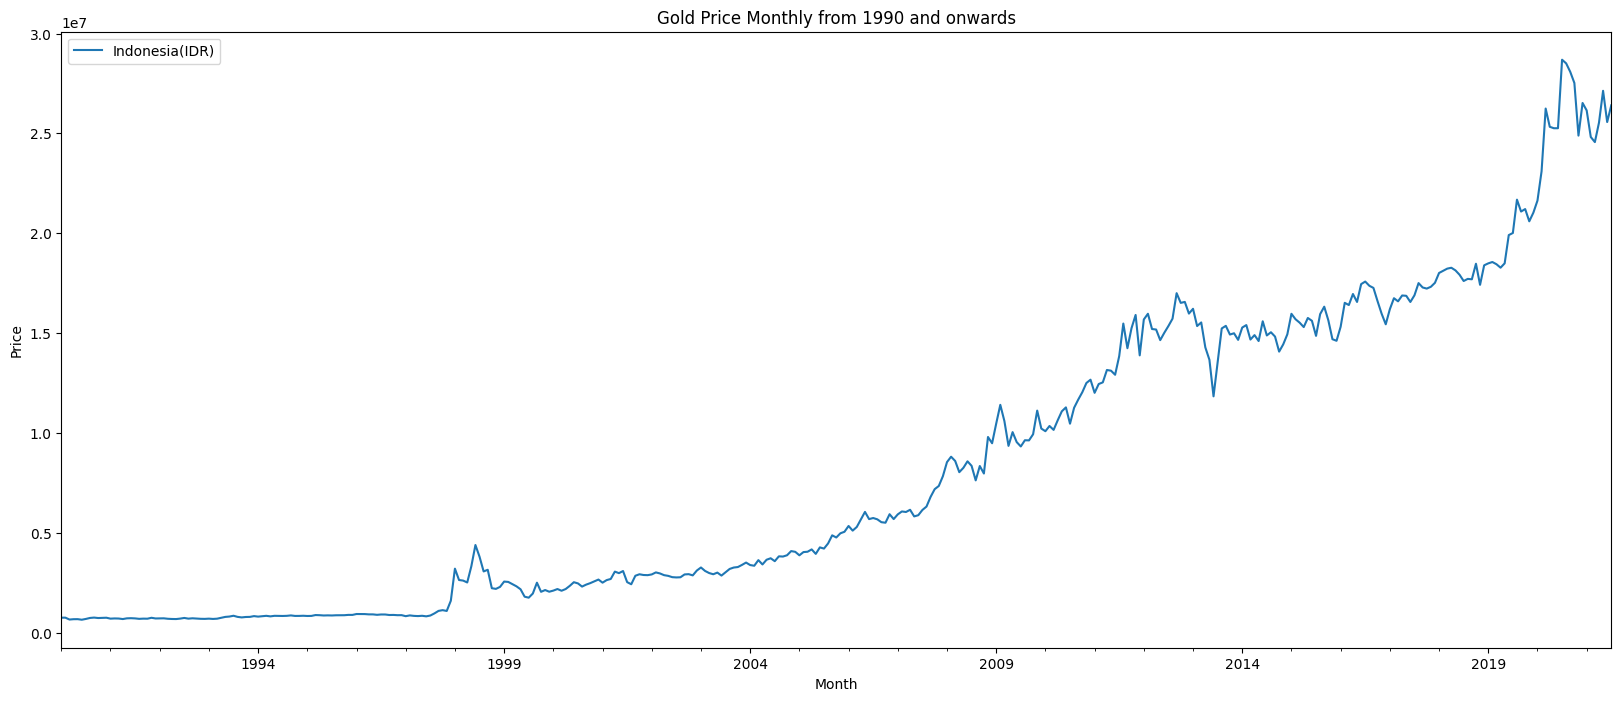

In [ ]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df_fix.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1990 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

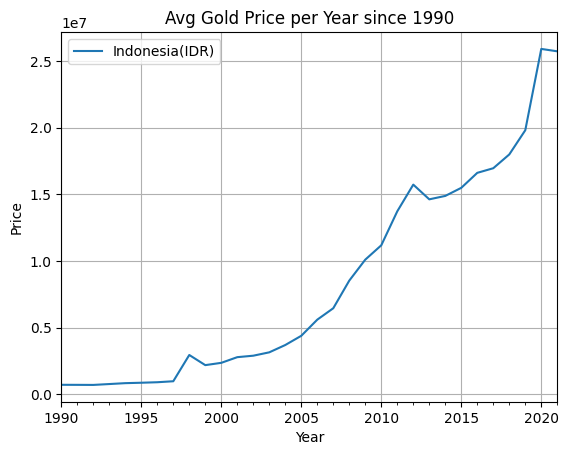

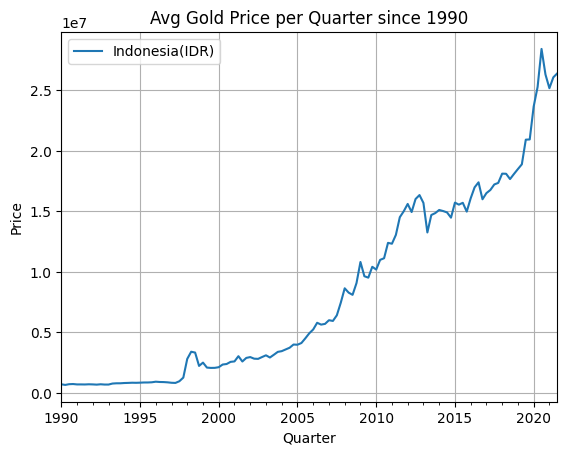

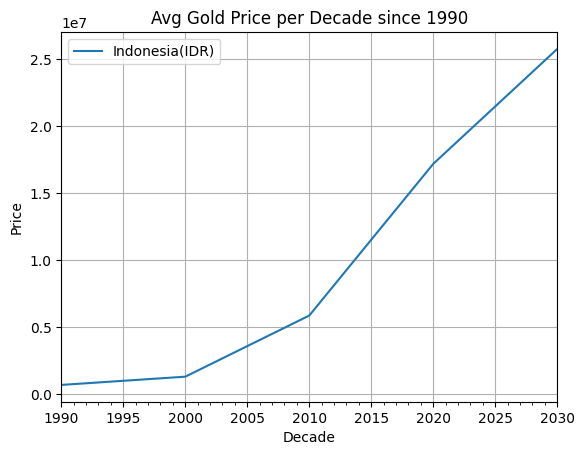

In [ ]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df_fix.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1990')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df_fix.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1990')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df_fix.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1990')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [ ]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df_fix.describe())

Summary statistics of gold prices:
        Indonesia(IDR)
count    3.790000e+02
mean     8.216117e+06
std      7.532845e+06
min      6.436786e+05
25%      1.358623e+06
50%      4.869742e+06
75%      1.521628e+07
max      2.868754e+07


The first few rows of the coefficient of variation data:
                Mean           Std  Cov_pct
month                                      
1990   708590.600000  40770.970458     5.75
1991   704737.925000  16067.457113     2.28
1992   699420.816667  16026.335432     2.29
1993   765085.633333  51623.380938     6.75
1994   831916.191667  15557.631961     1.87


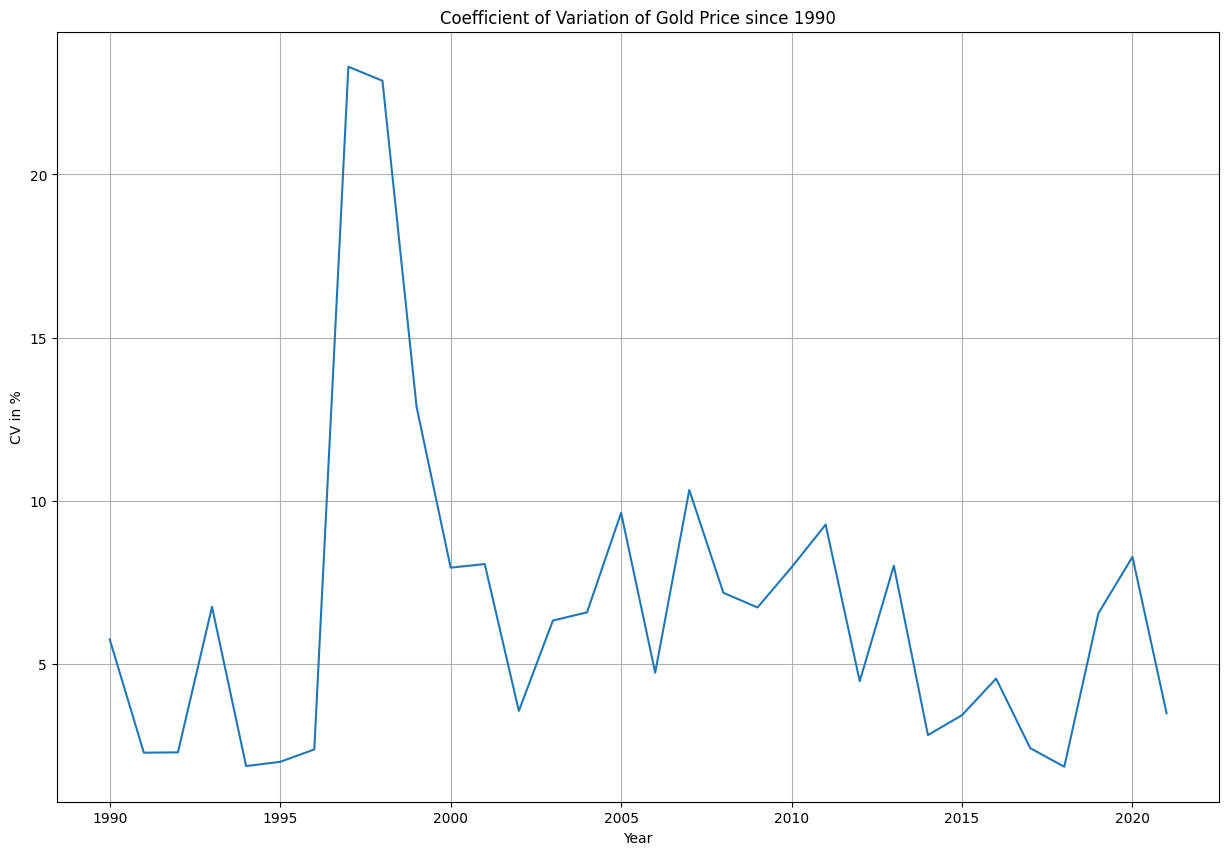

In [ ]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df_fix.groupby(df_fix.index.year).mean().rename(columns={'Indonesia(IDR)':'Mean'})
df_1 = df_1.merge(df_fix.groupby(df_fix.index.year).std().rename(columns={'Indonesia(IDR)':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1990')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

In [ ]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df_fix.index.year <= 2016]
test = df[df_fix.index.year > 2016]

# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df_fix) * 100
test_pct = len(test) / len(df_fix) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')
# It is not necessarily biased to split the data this way.
# However, it may depend on the specific problem and the goals of the analysis.
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on the model performance.

Training set shape: (324, 19)
Testing set shape: (55, 19)
Percentage of data in training set: 85.49 %
Percentage of data in testing set: 14.51 %


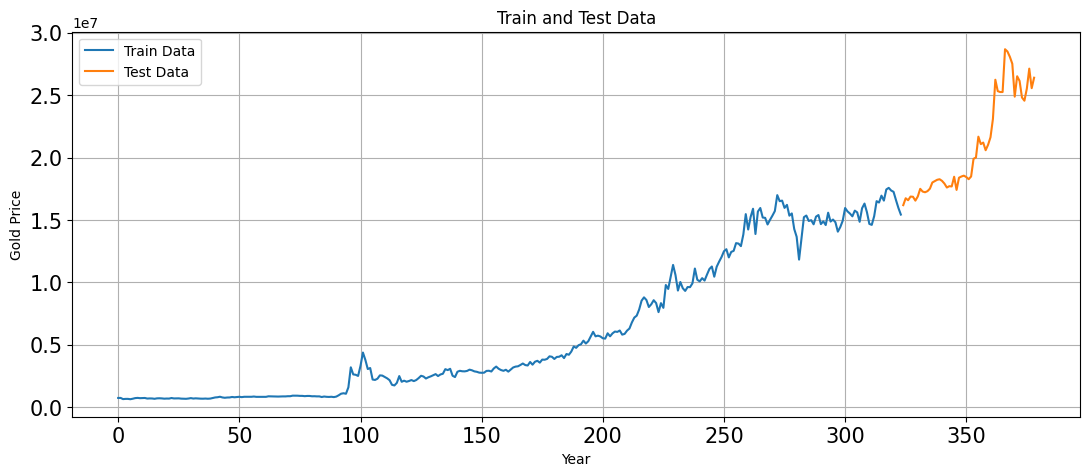

In [ ]:
# Plot train and test data
train['Indonesia(IDR)'].plot(figsize=(13,5), fontsize=15)
test['Indonesia(IDR)'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [ ]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 324
Test time series length: 55


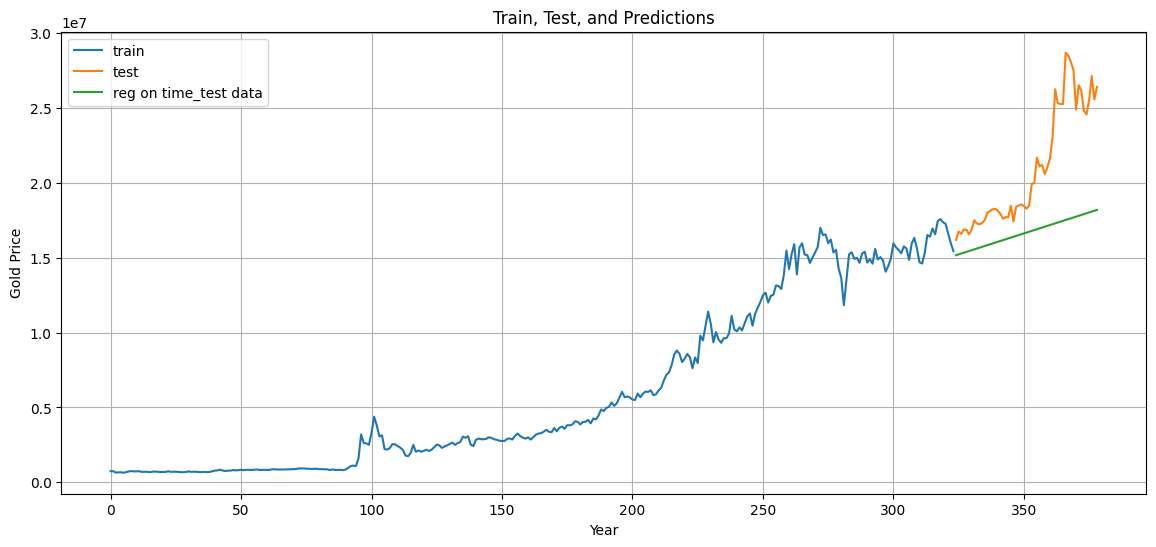

In [ ]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Indonesia(IDR)'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Indonesia(IDR)'], label='train')
plt.plot(test['Indonesia(IDR)'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()


In [ ]:
def mape(y_true, y_pred):
  """Calculate mean absolute percentage error (MAPE)"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Indonesia(IDR)'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")


MAPE for Regression on Time model on test data: 18.193%


In [ ]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},
index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,18.192613


In [ ]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df_fix, trend='additive', seasonal='additive').fit(
smoothing_level=0.2, smoothing_trend=0.1, smoothing_seasonal=0.3)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Indonesia(IDR)'].values, final_model.fittedvalues)
print('MAPE of exponential smoothing model: %.3f%%' % mape_final_model)

MAPE of exponential smoothing model: 6.771%


In [ ]:
resultsDf_3 = pd.DataFrame({'Test MAPE (%)': [mape_final_model]}, index=['exponential smoothing'])
results = pd.concat([results,resultsDf_3])
results

,Test MAPE (%)
Regression on Time,18.192613
exponential smoothing,6.771065


In [ ]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1), 'prediction': prediction,
'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})

# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True,
index_label='Month')
print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2021-08-31,2.612518e+07,2.768937e+07,2.925357e+07
2021-09-30,2.558442e+07,2.714861e+07,2.871280e+07
2021-10-31,2.525357e+07,2.681776e+07,2.838195e+07
2021-11-30,2.399372e+07,2.555791e+07,2.712210e+07
2021-12-31,2.475870e+07,2.632289e+07,2.788708e+07
2022-01-31,2.496567e+07,2.652986e+07,2.809405e+07
2022-02-28,2.503607e+07,2.660026e+07,2.816445e+07
2022-03-31,2.569555e+07,2.725974e+07,2.882393e+07
2022-04-30,2.583974e+07,2.740393e+07,2.896812e+07
2022-05-31,2.628466e+07,2.784885e+07,2.941304e+07


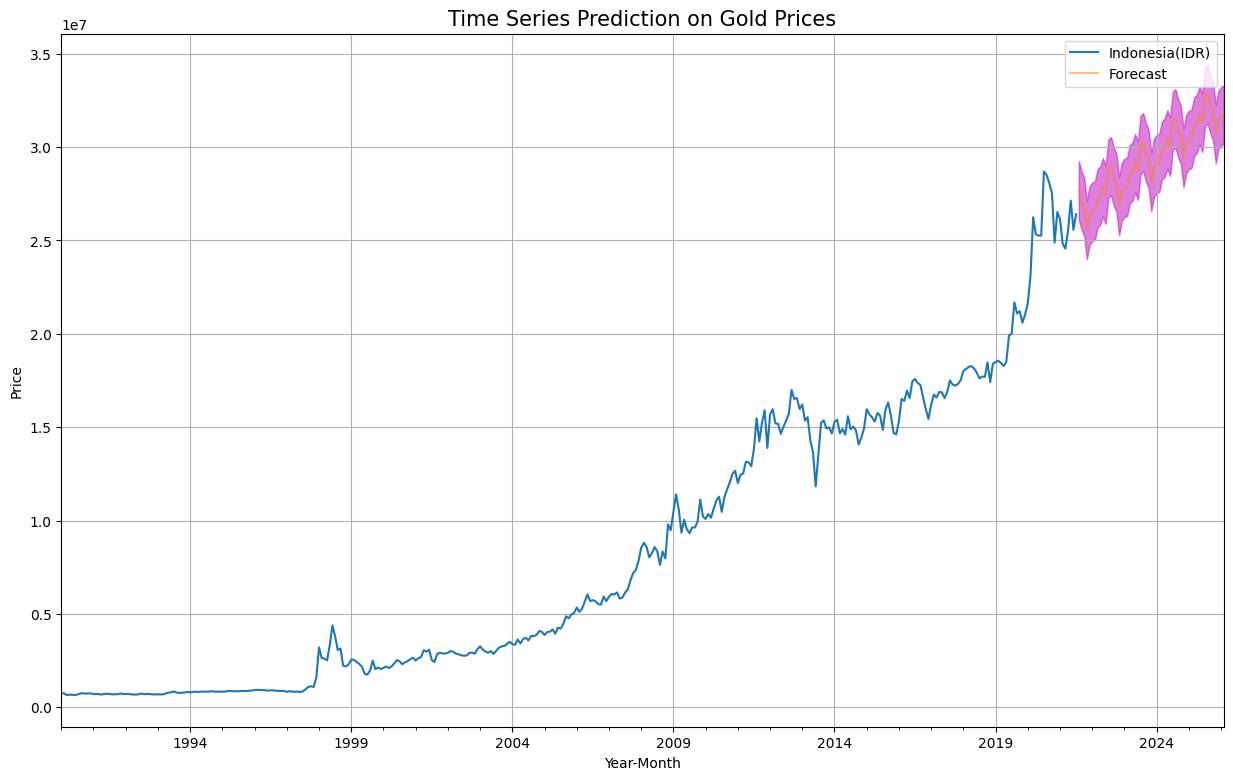

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot actual and predicted values with confidence intervals
axis = df_fix.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

# Save plot as png
plt.savefig('gold_price_predictions.png')

Prediction using Decision Tree Regression

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
data = df[['year','Indonesia(IDR)']]
dataset = np.array(data)
print(dataset)

[[1.99000000e+03 7.45400500e+05]
 [1.99000000e+03 7.47408300e+05]
 [1.99000000e+03 6.52783700e+05]
 [1.99000000e+03 6.69724500e+05]
 [1.99000000e+03 6.71905900e+05]
 [1.99000000e+03 6.43678600e+05]
 [1.99000000e+03 6.83200300e+05]
 [1.99000000e+03 7.32412100e+05]
 [1.99000000e+03 7.50542500e+05]
 [1.99000000e+03 7.28429800e+05]
 [1.99000000e+03 7.33905200e+05]
 [1.99000000e+03 7.43695800e+05]
 [1.99100000e+03 6.97763300e+05]
 [1.99100000e+03 7.08074800e+05]
 [1.99100000e+03 7.03234400e+05]
 [1.99100000e+03 6.77328200e+05]
 [1.99100000e+03 7.12877600e+05]
 [1.99100000e+03 7.20144000e+05]
 [1.99100000e+03 7.09925500e+05]
 [1.99100000e+03 6.87789900e+05]
 [1.99100000e+03 6.98068300e+05]
 [1.99100000e+03 6.94845400e+05]
 [1.99100000e+03 7.40279100e+05]
 [1.99100000e+03 7.06524600e+05]
 [1.99200000e+03 7.08094900e+05]
 [1.99200000e+03 7.13864600e+05]
 [1.99200000e+03 6.91011200e+05]
 [1.99200000e+03 6.80938400e+05]
 [1.99200000e+03 6.77051200e+05]
 [1.99200000e+03 6.99544400e+05]
 [1.992000

In [ ]:
X = dataset[:,0:1].astype(int)
print(X)

[[1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1990]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1991]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1992]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1993]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1994]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1995]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1996]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1997]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1998]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [1999]
 [2000]
 [2000]
 [2000]
 [2000]
 [2000]


In [ ]:
y = dataset[:,1:2].astype(int)

# print y
print(y)

[[  745400]
 [  747408]
 [  652783]
 [  669724]
 [  671905]
 [  643678]
 [  683200]
 [  732412]
 [  750542]
 [  728429]
 [  733905]
 [  743695]
 [  697763]
 [  708074]
 [  703234]
 [  677328]
 [  712877]
 [  720144]
 [  709925]
 [  687789]
 [  698068]
 [  694845]
 [  740279]
 [  706524]
 [  708094]
 [  713864]
 [  691011]
 [  680938]
 [  677051]
 [  699544]
 [  732421]
 [  697878]
 [  715105]
 [  701908]
 [  689393]
 [  685837]
 [  697207]
 [  683127]
 [  695490]
 [  738775]
 [  784975]
 [  802263]
 [  842476]
 [  785905]
 [  759562]
 [  780876]
 [  785713]
 [  824654]
 [  799380]
 [  818472]
 [  838754]
 [  811815]
 [  838890]
 [  836010]
 [  831531]
 [  838524]
 [  859191]
 [  833411]
 [  834629]
 [  842383]
 [  831153]
 [  834384]
 [  877296]
 [  870311]
 [  855643]
 [  861959]
 [  856403]
 [  866595]
 [  870144]
 [  868997]
 [  885540]
 [  884875]
 [  929317]
 [  928105]
 [  926467]
 [  911532]
 [  910957]
 [  889105]
 [  906032]
 [  905065]
 [  879848]
 [  883665]
 [  870698]
 [  

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting a new value

# test the output by changing values
y_pred = regressor.predict([[1991]])


# print the predicted price
print("Predicted price: % d\n"% y_pred)

Predicted price:  704737



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Given value
Y_true = [671905]

# Calculation of Mean Squared Error (MSE)
mape = mean_absolute_percentage_error(Y_true,y_pred)*100

print("MAPE = ", mape)

MAPE =  4.886479487427539


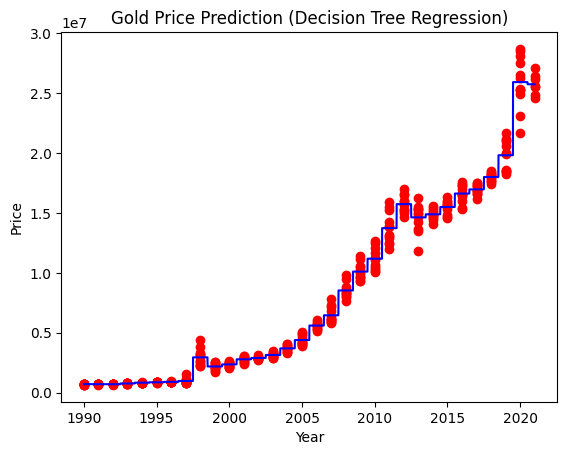

In [ ]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# specify title
plt.title('Gold Price Prediction (Decision Tree Regression)')

# specify X axis label
plt.xlabel('Year')

# specify Y axis label
plt.ylabel('Price')

# show the plot
plt.show()

In [ ]:
resultsDf_4 = pd.DataFrame({'Test MAPE (%)': [mape]}, index=['Decision Tree Regression'])
results = pd.concat([results,resultsDf_4])
results

,Test MAPE (%)
Regression on Time,18.192613
exponential smoothing,6.771065
Decision Tree Regression,4.886479


In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Year'])